In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float, img_as_ubyte, img_as_uint

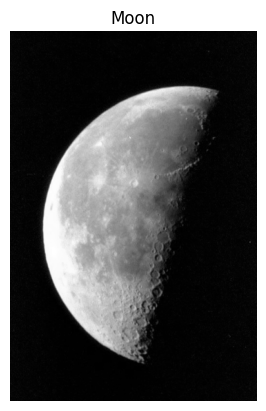

In [2]:
# a. Read and display Moon

moon = img_as_float(io.imread("moon.tif"))

def show_and_save(img, title, fname=None, cmap=None):
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis("off")
    if fname:
        plt.savefig(fname, dpi=200, bbox_inches="tight")
    plt.show()

show_and_save(moon, "Moon", "moon_original.png", cmap="gray")

In [3]:
# b. Data Structure

print("Moon Image Properties:")
print("  Shape:", moon.shape)
print("  Data type:", moon.dtype)
print("  Min/Max:", float(moon.min()), float(moon.max()))

print("\nTop-left 5x5 pixel block:\n", moon[:5, :5])

moon_u8  = img_as_ubyte(moon)
moon_u16 = img_as_uint(moon)
print("\nuint8 :", moon_u8.dtype,  moon_u8.min(),  moon_u8.max())
print("uint16:", moon_u16.dtype, moon_u16.min(), moon_u16.max())

Moon Image Properties:
  Shape: (537, 358)
  Data type: float64
  Min/Max: 0.0 0.9921568627450981

Top-left 5x5 pixel block:
 [[0.00392157 0.01176471 0.02745098 0.01960784 0.00784314]
 [0.01176471 0.02745098 0.01176471 0.01176471 0.01568627]
 [0.02352941 0.01568627 0.02352941 0.01960784 0.00784314]
 [0.02745098 0.01960784 0.02745098 0.02745098 0.01960784]
 [0.00784314 0.01960784 0.01176471 0.02352941 0.02745098]]

uint8 : uint8 0 253
uint16: uint16 0 65021


In [4]:
# c + d. Perform amd store SVD

U, S, VT = np.linalg.svd(moon, full_matrices=False)

print("\nSVD shapes (Moon):")
print("  U:", U.shape, " S:", S.shape, " VT:", VT.shape)

print("\nFirst 10 singular values (Moon):\n", S[:10])
print("\nTop-left 5x5 of U:\n", U[:5, :5])
print("\nTop-left 5x5 of VT:\n", VT[:5, :5])


SVD shapes (Moon):
  U: (537, 358)  S: (358,)  VT: (358, 358)

First 10 singular values (Moon):
 [144.48688375  50.23003683  35.46956411  21.67428614  16.48952157
  12.89018452  10.86782496   9.18106444   8.11430069   7.18146101]

Top-left 5x5 of U:
 [[-6.97870366e-04 -6.97707823e-04 -1.50235171e-03  1.26120278e-05
   1.73503856e-03]
 [-8.36009772e-04 -8.28752393e-04 -1.63330517e-03 -1.68537748e-04
   1.60766928e-03]
 [-7.73184261e-04 -5.74859310e-04 -1.72188532e-03 -2.70011985e-04
   1.25887711e-03]
 [-7.55333390e-04 -5.14543807e-04 -1.62043096e-03 -1.80008061e-04
   1.60253955e-03]
 [-7.96445846e-04 -6.54628965e-04 -1.86463121e-03 -5.66523095e-05
   2.15546344e-03]]

Top-left 5x5 of VT:
 [[-2.65587911e-03 -3.20743551e-03 -2.93511274e-03 -2.65149605e-03
  -2.72155179e-03]
 [-1.86725445e-03 -2.02239230e-03 -1.53148903e-03 -1.84290010e-03
  -1.70470153e-03]
 [-5.63864121e-04  5.11927004e-04 -7.63562714e-04  1.66117200e-04
  -3.64398222e-04]
 [-1.40961123e-03 -1.15541386e-03 -1.93228494

In [5]:
# e. Low-rank approximation

def low_rank_approx(U, S, VT, k):
    Uk, Sk, VTk = U[:, :k], S[:k], VT[:k, :]
    return (Uk * Sk) @ VTk

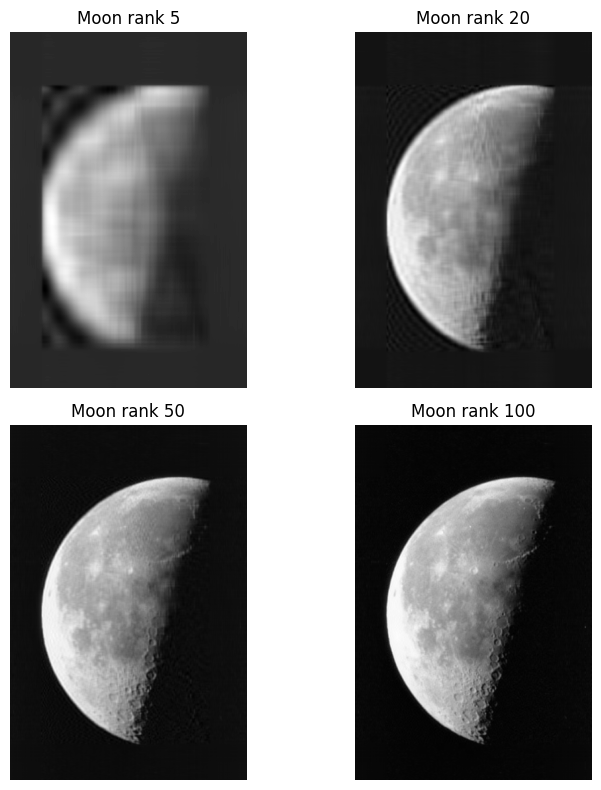

In [6]:
# f. Compress using different ranks

ranks = [5, 20, 50, 100]

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
for ax, k in zip(axes.ravel(), ranks):
    Ak = low_rank_approx(U, S, VT, k)
    ax.imshow(Ak, cmap="gray"); ax.set_title(f"Moon rank {k}"); ax.axis("off")
    plt.imsave(f"moon_rank_{k}.png", Ak, cmap="gray")
plt.tight_layout()
plt.savefig("moon_compressed_2x2.png", dpi=200, bbox_inches="tight")
plt.show()

In [7]:
# g. Compute PSNR

def rmse(original, approx):
    return np.sqrt(np.mean((original - approx) ** 2))
def psnr(original, approx, max_range=1.0):
    rmse_val = rmse(original, approx)
    return 10 * np.log10((max_range ** 2) / rmse_val)

rows = []
print("\nPSNR Table:")
print("Rank | PSNR")
for k in ranks:
    Ak = low_rank_approx(U, S, VT, k)
    p= psnr(moon, Ak) 
    rows.append((k, p))
    print(f"{k:4d} | {p:4.2f}")


PSNR Table:
Rank | PSNR
   5 | 11.73
  20 | 15.51
  50 | 18.68
 100 | 21.80


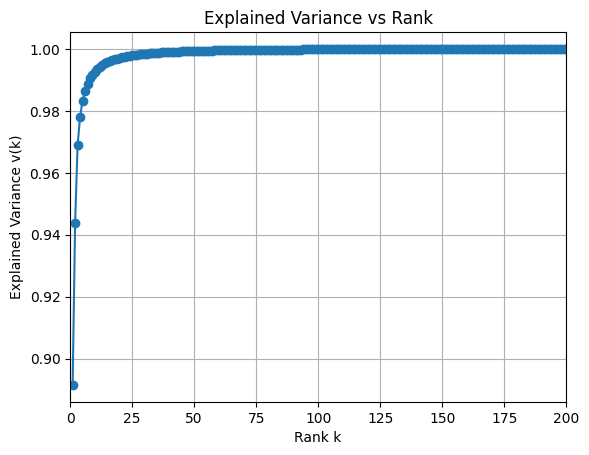

In [8]:
# h. Explained variance

def explained_variance(S):
    ev2 = np.cumsum(S ** 2) / np.sum(S ** 2) 
    return np.sqrt(ev2)   

plt.plot(np.arange(1, len(S)+1), explained_variance(S), marker="o")
plt.xlabel("Rank k")
plt.xlim(0, 200)
plt.ylabel("Explained Variance v(k)")
plt.title("Explained Variance vs Rank")
plt.grid(True)
plt.show()

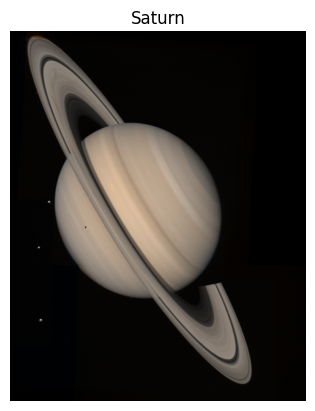

In [9]:
# i. Color image compression

# Display the graph

saturn = img_as_float(io.imread("saturn.png"))

show_and_save(saturn, "Saturn", "saturn_original.png")

In [10]:
# Data Structure

print("\nSaturn Image Properties:")
print("  Shape:", saturn.shape)           # (m, n, 3)
print("  Data type:", saturn.dtype)
print("  Min/Max:", float(saturn.min()), float(saturn.max()))

print("\nTop-left 5x5 pixel block:")
print(saturn[:5, :5])


Saturn Image Properties:
  Shape: (1500, 1200, 3)
  Data type: float64
  Min/Max: 0.0 0.8901960784313725

Top-left 5x5 pixel block:
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [11]:
# c + d. Perform and store SVD

channels = ["Red", "Green", "Blue"]
svd_results = []

for i, ch in enumerate(channels):
    Uc, Sc, VTc = np.linalg.svd(saturn[:, :, i], full_matrices=False)
    svd_results.append((Uc, Sc, VTc))
    print(f"\n{ch} channel SVD:")
    print("  U:", Uc.shape, " S:", Sc.shape, " VT:", VTc.shape)
    print("  First 5 singular values:", Sc[:5])
    print("  Top-left 3x3 U:\n", Uc[:3, :3])
    print("  Top-left 3x3 VT:\n", VTc[:3, :3])


Red channel SVD:
  U: (1500, 1200)  S: (1200,)  VT: (1200, 1200)
  First 5 singular values: [370.63560052  98.52054562  92.09532173  57.91109651  48.6017375 ]
  Top-left 3x3 U:
 [[-1.60679104e-05 -3.48871603e-04  1.18805474e-03]
 [-1.67587480e-05 -3.51961623e-04  1.19724330e-03]
 [-1.89022582e-05 -3.87968550e-04  1.30879712e-03]]
  Top-left 3x3 VT:
 [[-3.04816883e-04 -3.27071860e-04 -3.58169457e-04]
 [ 1.11133420e-03  1.13028919e-03  1.18211378e-03]
 [-1.23969563e-04 -8.11840417e-05 -2.97768693e-05]]

Green channel SVD:
  U: (1500, 1200)  S: (1200,)  VT: (1200, 1200)
  First 5 singular values: [330.9761239   90.87868657  85.63390443  53.29313757  43.9046864 ]
  Top-left 3x3 U:
 [[-1.02838819e-05 -2.02202140e-04  7.01302995e-04]
 [-1.06587163e-05 -2.03172266e-04  7.03654016e-04]
 [-1.21115923e-05 -2.20774870e-04  7.61321292e-04]]
  Top-left 3x3 VT:
 [[-3.49323199e-04 -3.74342882e-04 -4.09054282e-04]
 [ 1.44130059e-03  1.47788243e-03  1.53410953e-03]
 [-2.89552411e-05  2.13058901e-05  7

In [12]:
# Low-rank approximation

def compress_color_k(k):
    chans = []
    for (Uc, Sc, VTc) in svd_results:
        Ak = low_rank_approx(Uc, Sc, VTc, k)
        chans.append(Ak)
    return np.stack(chans, axis=2)

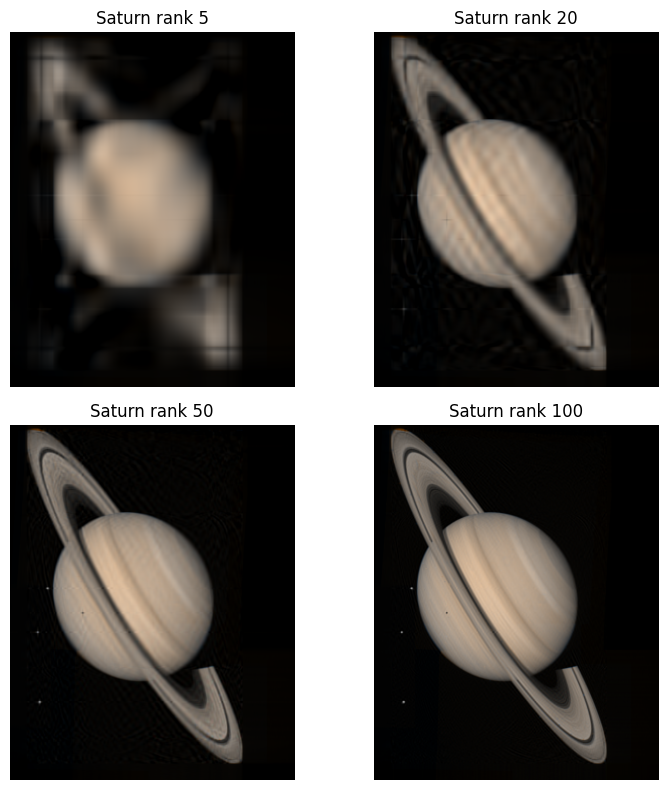

In [13]:
# Compress using different ranks

color_ranks = [5, 20, 50, 100]

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
for ax, k in zip(axes.ravel(), color_ranks):
    sat_k = np.clip(compress_color_k(k), 0, 1)
    ax.imshow(sat_k)
    ax.set_title(f"Saturn rank {k}")
    ax.axis("off")
    plt.imsave(f"saturn_rank_{k}.png", sat_k)

plt.tight_layout()
plt.savefig("saturn_compressed_2x2.png", dpi=200, bbox_inches="tight")
plt.show()

In [14]:
# PSNR

rows_rgb = []
rows_R, rows_G, rows_B = [], [], []
print("\nPSNR Table")
print("Rank | PSNR")
for k in color_ranks:
    Ak = compress_color_k(k)
    p = psnr(saturn, Ak, max_range=1.0)
    rows_rgb.append((k, p))
    print(f"{k:4d} | {p:4.2f}")


PSNR Table
Rank | PSNR
   5 | 11.63
  20 | 15.40
  50 | 18.16
 100 | 21.26


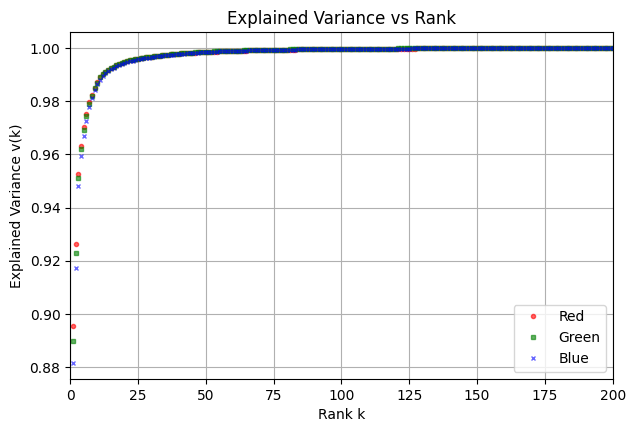

In [15]:
# Explained Variance

plt.figure(figsize=(7.0, 4.5))
markers = ["o", "s", "x"]
colors  = ["red", "green", "blue"]
for (Uc, Sc, VTc), ch, mk, col in zip(svd_results, channels, markers, colors):
    v_ch = explained_variance(Sc)
    plt.plot(np.arange(1, len(Sc) + 1),
             v_ch, linestyle="none", marker=mk, color=col,
             markersize=3, alpha=0.6, label=ch)

plt.xlabel("Rank k")

plt.ylabel("Explained Variance v(k)")
plt.xlim(0, 200)
plt.title("Explained Variance vs Rank")
plt.legend()
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig("saturn_explained_variance_per_channel.png", dpi=200, bbox_inches="tight")
plt.show()

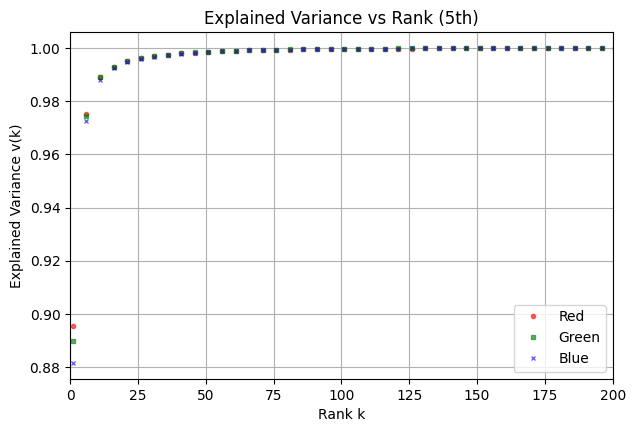

In [17]:
# Explained Variance (plot every 5th rank)

plt.figure(figsize=(7.0, 4.5))
markers = ["o", "s", "x"]
colors  = ["red", "green", "blue"]
step = 5

for (Uc, Sc, VTc), ch, mk, col in zip(svd_results, channels, markers, colors):
    v_ch = explained_variance(Sc)
    x_full = np.arange(1, len(Sc) + 1)

    x = x_full[::step]
    y = v_ch[::step]

    if x[-1] != x_full[-1]:
        x = np.r_[x, x_full[-1]]
        y = np.r_[y, v_ch[-1]]

    plt.plot(
        x, y,
        linestyle="none",
        marker=mk,
        color=col,
        markersize=3,
        alpha=0.6,
        label=ch
    )

plt.xlabel("Rank k")
plt.xlim(0, 200)
plt.ylabel("Explained Variance v(k)")
plt.title("Explained Variance vs Rank (5th)")
plt.legend()
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig("saturn_explained_variance_step_per_channel.png", dpi=200, bbox_inches="tight")
plt.show()
